In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.2.4-tf'

In [4]:
tf.__version__


'1.14.0'

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
#(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


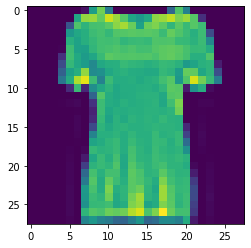

In [9]:
plt.imshow(train_images[10])

In [10]:
train_labels[0]

9

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[train_labels[10]]

'T-shirt/top'

In [13]:
train_images[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [14]:

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

X_train_n = train_images / 255.
X_test_n = test_images / 255.

In [16]:
model = keras.models.Sequential()
#model.add(keras.layers.Flatten(input_shape=[28, 28]))
#model.add(keras.layers.Dense(300, activation="relu"))
#model.add(keras.layers.Dense(100, activation="relu"))
#model.add(keras.layers.Dense(50, activation="relu"))
#model.add(keras.layers.Dense(10, activation="softmax"))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))	


W1028 18:13:28.904558 140113485555520 deprecation.py:506] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [20]:
model_history = model.fit(X_train_n, train_labels, epochs=20, batch_size=512, shuffle=True, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 7s 127us/sample - loss: 0.6342 - acc: 0.7878 - val_loss: 0.4058 - val_acc: 0.8568
Epoch 2/20
54000/54000 [==============================] - 6s 118us/sample - loss: 0.3805 - acc: 0.8667 - val_loss: 0.3704 - val_acc: 0.8692
Epoch 3/20
54000/54000 [==============================] - 6s 118us/sample - loss: 0.3361 - acc: 0.8825 - val_loss: 0.3263 - val_acc: 0.8820
Epoch 4/20
54000/54000 [==============================] - 7s 125us/sample - loss: 0.3104 - acc: 0.8907 - val_loss: 0.3127 - val_acc: 0.8903
Epoch 5/20
54000/54000 [==============================] - 6s 114us/sample - loss: 0.2883 - acc: 0.8983 - val_loss: 0.2961 - val_acc: 0.8947
Epoch 6/20
54000/54000 [==============================] - 7s 131us/sample - loss: 0.2736 - acc: 0.9032 - val_loss: 0.2872 - val_acc: 0.8977
Epoch 7/20
54000/54000 [==============================] - 7s 122us/sample - loss: 0.2605 - acc: 0.9063 - val_lo

In [21]:
model_history.params

{'batch_size': 512,
 'epochs': 20,
 'steps': None,
 'samples': 54000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [22]:
model_history.history

{'loss': [0.6342310640988527,
  0.38053683590888976,
  0.336097771247228,
  0.31039439272880553,
  0.2882507927770968,
  0.27355206754914035,
  0.2605078338649538,
  0.2447817563480801,
  0.23646920994476037,
  0.22559572535090977,
  0.21391084471896843,
  0.2104700987206565,
  0.19718717659844293,
  0.19013254012884917,
  0.18294521086304277,
  0.17240638313249304,
  0.16710640400868876,
  0.16112498846318987,
  0.15317713587813908,
  0.14686303020848168],
 'acc': [0.7878148,
  0.8667037,
  0.8825,
  0.8907037,
  0.8982593,
  0.9031852,
  0.90625924,
  0.91235185,
  0.91642594,
  0.9199074,
  0.9253333,
  0.92466664,
  0.9300741,
  0.932537,
  0.93557405,
  0.9398519,
  0.9411296,
  0.9430185,
  0.9462778,
  0.94825923],
 'val_loss': [0.4058038781483968,
  0.370393275419871,
  0.3263327705065409,
  0.3127317155996958,
  0.29605817222595215,
  0.2872215633392334,
  0.2861197637716929,
  0.27845653462409975,
  0.26589540966351827,
  0.26042386627197267,
  0.2725930078824361,
  0.2586731

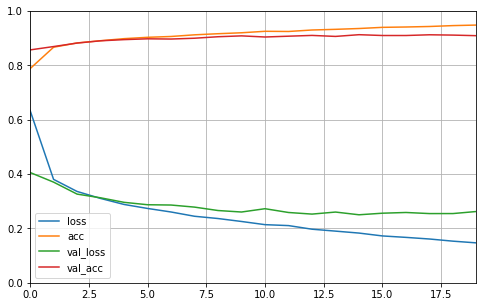

In [23]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [24]:
model.evaluate(X_test_n, test_labels)

10000/10000 [==============================] - 1s 82us/sample - loss: 0.2702 - acc: 0.9068


[0.27015181905031205, 0.9068]

In [25]:
X_new = X_test_n[:3]

In [26]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')